In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #Importing the required libraries

In [ ]:
#Question 1

In [2]:
df = pd.read_csv('Part-+1%2C2%263+-+Signal.csv') #Reading the given dataset

In [3]:
df

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
print(df.shape) #Exploring the shape of dataframe

(1599, 12)


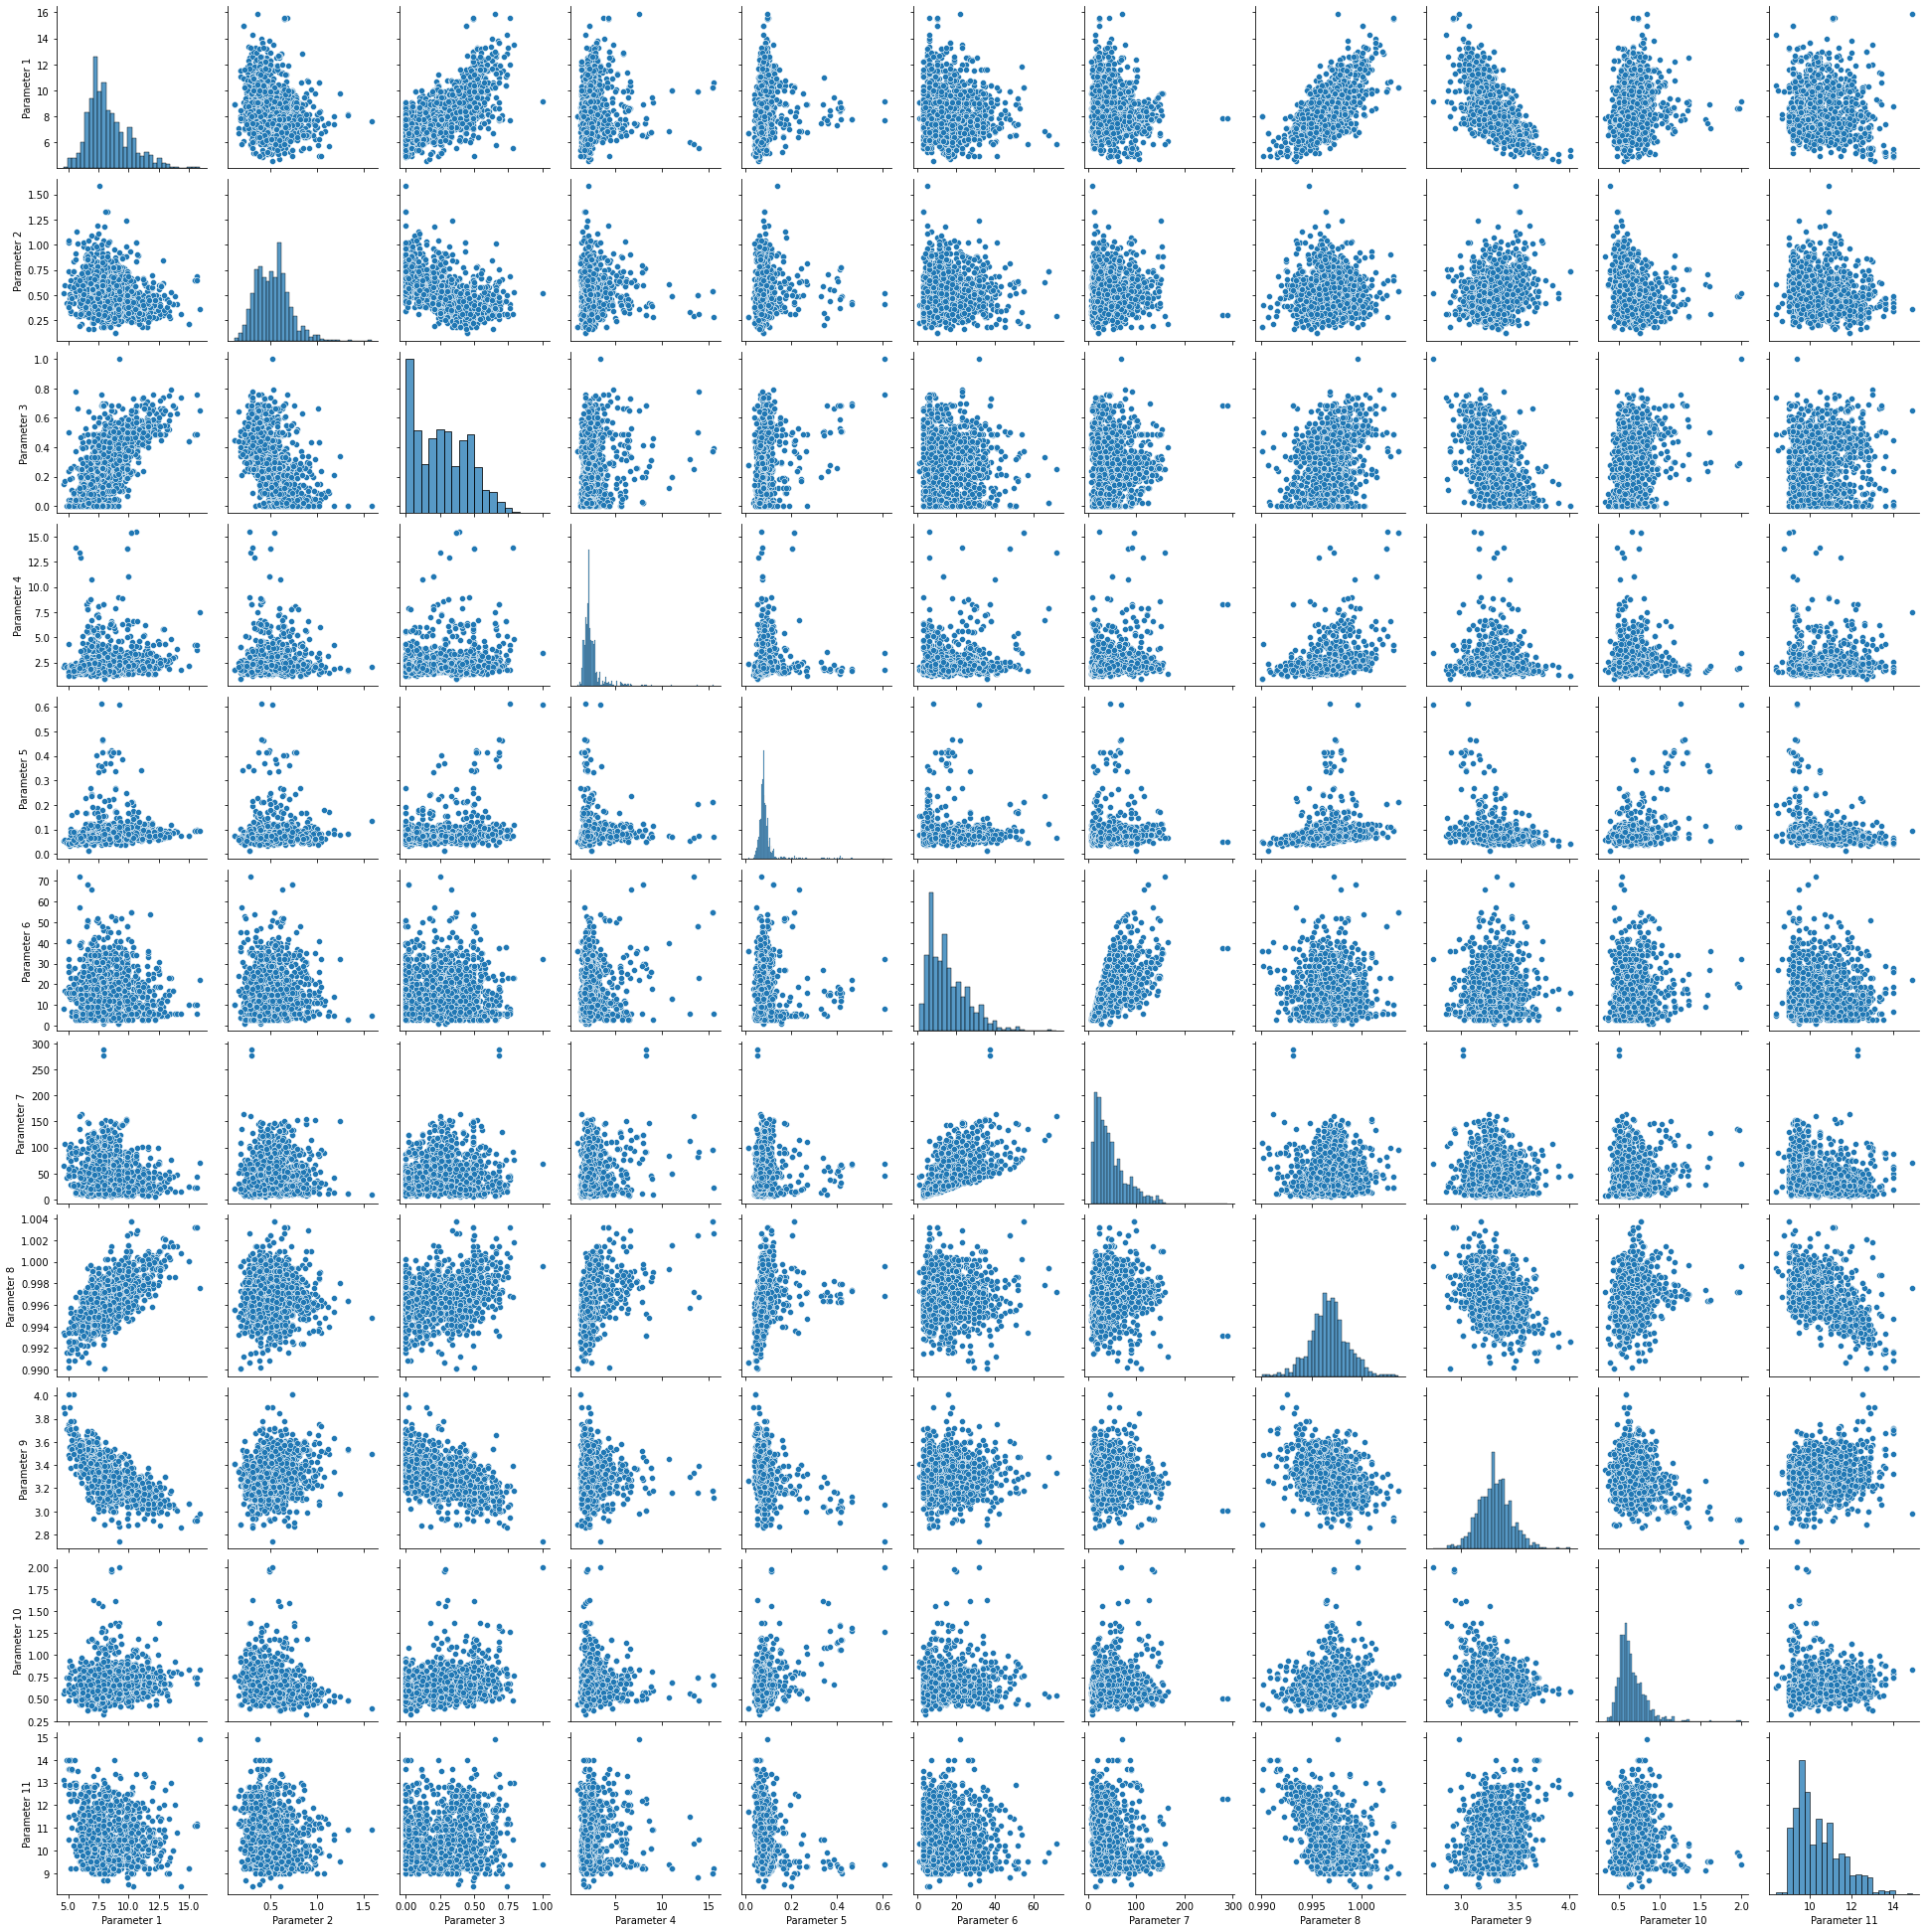

In [5]:
sns.pairplot(df.drop('Signal_Strength',axis=1))

In [6]:
#Most of the variables are univariate, but not all of them are having uniform distribution along the centre.
#Many of the variables are right skewed, which means that there are several outliers present on the higher side of those variables

<AxesSubplot:>

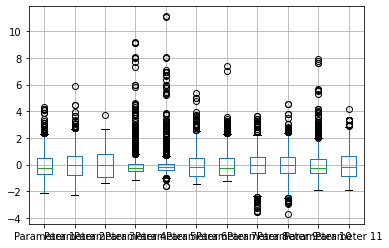

In [7]:
#Let's check out the boxplots on the normalized data, just to see the extent of outliers in all of the variables on a common scale
from scipy.stats import zscore
df.drop('Signal_Strength',axis=1).apply(zscore).boxplot()

In [8]:
#Lots of outliers are present in all of the variables.
#Let's replace these outliers with the respective quartile values of the variables.
df1 = df.drop('Signal_Strength',axis=1)
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

In [9]:
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(df1 < Q1 - 1.5 * IQR)[0], np.where(df1 < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df1.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(df1 > Q3 + 1.5 * IQR)[0], np.where(df1> Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df1.iloc[i,j] = whisker[j]

<AxesSubplot:>

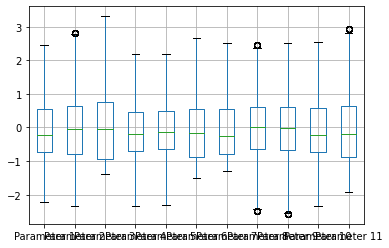

In [10]:
df1.apply(zscore).boxplot() #Much lesser number of outliers are now present in the dataset.

<AxesSubplot:>

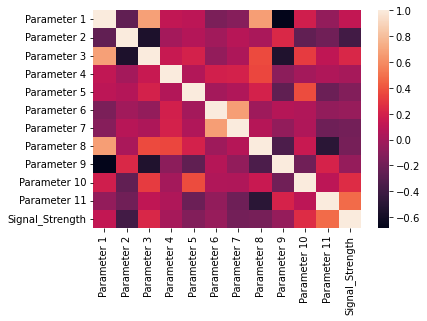

In [11]:
#Let's check out the degree of correlation between all of the variables
sns.heatmap(df.corr())

In [12]:
#Apart from few negatively correlated variables, no 2 variables have strong degree of correlation among them.

In [13]:
#Training a neural network regressor
import tensorflow

In [14]:
#Performing train test split first
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Signal_Strength',axis=1), df['Signal_Strength'], test_size=0.30, random_state=1)

In [19]:
#Let's try training the neural network regressor without normalization and without changing the default values of hyperparameters.
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(64,activation='relu'))
network.add(layers.Dense(64,activation='relu'))
network.add(layers.Dense(1))
network.compile(loss='mse',optimizer='rmsprop')

In [20]:
#Here, we have trained a neural network with 2 hidden layers, with 64 units in each hidden layer, with an output layer of single unit

In [21]:
network.fit(X_train, y_train, epochs=100, validation_split=0.35)

Epoch 1/100
23/23 [==============================] - 4s 18ms/step - loss: 3.1504 - val_loss: 0.9434
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.8417 - val_loss: 2.3365
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 1.1518 - val_loss: 1.6737
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.9575 - val_loss: 1.8221
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.8712 - val_loss: 1.0812
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 1.0711 - val_loss: 0.6345
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.9161 - val_loss: 0.6759
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 0.8840 - val_loss: 1.0592
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7635 - val_loss: 0.6321
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 0.8744 - val_loss: 0.5753
Epoch 11

In [23]:
network.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [31]:
mse_test = np.mean(np.square(np.array(network.predict(X_test))-np.array(y_test)))
print(mse_test) #This is the mean squared error of the test data, as per the prediction of the neural network

1.0314693534034545


In [32]:
#Let's try scaling the data first and then let's train the neural network in the same manner as before.
#Let's go with the standard scaler
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [33]:
#Let's train the neural network on the scaled data now.
network2 = models.Sequential()
network2.add(layers.Dense(64,activation='relu'))
network2.add(layers.Dense(64,activation='relu'))
network2.add(layers.Dense(1))
network2.compile(loss='mse',optimizer='rmsprop')

In [34]:
network2.fit(X_train_scaled, y_train, epochs=100, validation_split=0.35)

Epoch 1/100
23/23 [==============================] - 2s 15ms/step - loss: 20.9012 - val_loss: 10.3130
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 6.2173 - val_loss: 3.8200
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 2.8791 - val_loss: 2.7847
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 2.1109 - val_loss: 2.1547
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 1.7065 - val_loss: 1.9065
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 1.4706 - val_loss: 1.6282
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 1.2925 - val_loss: 1.3902
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 1.1094 - val_loss: 1.3381
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.9855 - val_loss: 1.1497
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 0.8684 - val_loss: 1.0713
Epoch 

In [35]:
#Let's see how the scaling has affected the performance, by checking the mean squared error
mse_test2 = np.mean(np.square(np.array(network2.predict(X_test_scaled))-np.array(y_test)))
print(mse_test2) 
'''Scaling hasn't improved the performance, as the MSE has increased.
   At the same time, we can see that the training loss has in fact decreased, but the validation loss has increased a lot,
   which is an indicator that there's overfitting.'''

1.1857700005348757


In [48]:
#Let's see if we can improve the performance by using a different optimizing algorithm like ADAM.
#Let's try with ADAM first.
network3_adam = models.Sequential()
network3_adam.add(layers.Dense(64,activation='relu'))
network3_adam.add(layers.Dense(64,activation='relu'))
network3_adam.add(layers.Dense(1))
network3_adam.compile(loss='mse',optimizer='adam')

In [49]:
network3_adam.fit(X_train, y_train, epochs=100, validation_split=0.35) #Let's try the unscaled data first 

Epoch 1/100
23/23 [==============================] - 1s 7ms/step - loss: 5.3001 - val_loss: 1.1772
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.8434 - val_loss: 1.0664
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6254 - val_loss: 0.8456
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5899 - val_loss: 0.7290
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5645 - val_loss: 0.6954
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5548 - val_loss: 0.7275
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5368 - val_loss: 0.6380
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5120 - val_loss: 0.6382
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4901 - val_loss: 0.5931
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5014 - val_loss: 0.6282
Epoch 11/

In [50]:
mse_test3_adam_unscaled = np.mean(np.square(np.array(network3_adam.predict(X_test))-np.array(y_test)))
print(mse_test3_adam_unscaled) #Huge improvement over the first 2 models.

0.8679164407652269


In [53]:
#Let's try wih scaled data now now.
network3_adam_scaled = models.Sequential()
network3_adam_scaled.add(layers.Dense(64,activation='relu'))
network3_adam_scaled.add(layers.Dense(64,activation='relu'))
network3_adam_scaled.add(layers.Dense(1))
network3_adam_scaled.compile(loss='mse',optimizer='adam')

In [54]:
network3_adam_scaled.fit(X_train_scaled, y_train, epochs=100, validation_split=0.35)

Epoch 1/100
23/23 [==============================] - 1s 8ms/step - loss: 19.7305 - val_loss: 10.1771
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 5.8882 - val_loss: 3.5384
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 3.0158 - val_loss: 2.6378
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 2.2914 - val_loss: 2.2199
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9568 - val_loss: 1.9961
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 1.7661 - val_loss: 1.8188
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 1.6070 - val_loss: 1.6817
Epoch 8/100
23/23 [==============================] - 0s 7ms/step - loss: 1.4531 - val_loss: 1.5728
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 1.3356 - val_loss: 1.4629
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 1.2276 - val_loss: 1.3896
Epoch 1

In [59]:
mse_test3_adam_scaled = np.mean(np.square(np.array(network3_adam_scaled.predict(X_test_scaled))-np.array(y_test)))
print(mse_test3_adam_scaled) #Higher error shows that the one with unscaled data was a better model.

0.9793514119544096


In [57]:
#Let's try the batch normalization here, with unscaled data and ADAM optimizer.
from tensorflow.keras.layers import BatchNormalization, Dropout
network4_adam_bn = models.Sequential()
network4_adam_bn.add(layers.Dense(64,activation='relu'))
network4_adam_bn.add(BatchNormalization()) 
network4_adam_bn.add(layers.Dense(64,activation='relu'))
network4_adam_bn.add(BatchNormalization()) 
network4_adam_bn.add(layers.Dense(1))
network4_adam_bn.compile(loss='mse',optimizer='adam')

In [58]:
network4_adam_bn.fit(X_train, y_train, epochs=100, validation_split=0.35)

Epoch 1/100
23/23 [==============================] - 2s 9ms/step - loss: 31.9288 - val_loss: 48.6668
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 28.7824 - val_loss: 33.3587
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 25.5939 - val_loss: 21.6240
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 21.7273 - val_loss: 15.6522
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 17.3305 - val_loss: 10.5975
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 12.8085 - val_loss: 6.7623
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 8.6176 - val_loss: 4.4461
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 5.2616 - val_loss: 1.9397
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 2.9329 - val_loss: 1.0253
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 1.5475 - val_loss: 1.144

In [60]:
mse_test4_adam_bn = np.mean(np.square(np.array(network4_adam_bn.predict(X_test))-np.array(y_test)))
print(mse_test4_adam_bn) #Poorer perfomance than the previous model.

1.2659568648776192


In [61]:
#Let's add dropout here.
network4_adam_bn_do = models.Sequential()
network4_adam_bn_do.add(layers.Dense(64,activation='relu'))
network4_adam_bn_do.add(BatchNormalization())
network4_adam_bn_do.add(Dropout(0.2))
network4_adam_bn_do.add(layers.Dense(64,activation='relu'))
network4_adam_bn_do.add(BatchNormalization()) 
network4_adam_bn_do.add(Dropout(0.2))
network4_adam_bn_do.add(layers.Dense(1))
network4_adam_bn_do.compile(loss='mse',optimizer='adam')

In [62]:
network4_adam_bn_do.fit(X_train, y_train, epochs=100, validation_split=0.35)

Epoch 1/100
23/23 [==============================] - 2s 16ms/step - loss: 32.0540 - val_loss: 41.1026
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 29.7427 - val_loss: 30.2787
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 27.1365 - val_loss: 23.0357
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 24.3025 - val_loss: 19.8278
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 21.0141 - val_loss: 16.8212
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 17.6621 - val_loss: 12.4288
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 14.6469 - val_loss: 9.3280
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 11.3114 - val_loss: 6.7820
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 8.5051 - val_loss: 4.6115
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 6.1545 - val_loss: 3

In [63]:
mse_test4_adam_bn_do = np.mean(np.square(np.array(network4_adam_bn_do.predict(X_test))-np.array(y_test)))
print(mse_test4_adam_bn_do) #Best result generated so far, after introducing dropout.

0.8417852301250408


In [64]:
'''A complete hyperparameter tuning involving altering the number of hidden layers,
   number of units in those hidden layers, number of epochs, activation functions,
   dropout probability, etc. might generate better results.
   But let's take the best result generating model with ADAM optimizer, with batch normalization and dropout with
   probability of 0.2 as the final model for this problem.'''
#Saving/pickling the model for future use.
network4_adam_bn_do.save('NN with ADAM, batch norm and dropout')

INFO:tensorflow:Assets written to: NN with ADAM, batch norm and dropout\assets


In [65]:
#Question 2

In [91]:
import h5py

#Loading the dataset
h5_df  = h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5','r')

In [122]:
X_train = h5_df['X_train']
X_test= h5_df['X_test']
y_train= h5_df['y_train']
y_test= h5_df['y_test']

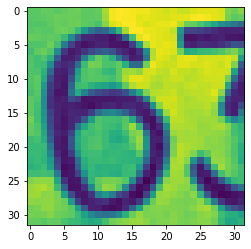

In [123]:
plt.imshow(X_train[1])
plt.show() #Exploring a training sample randomly.

In [124]:
pd.Series(y_train).value_counts() #Uniform distribution of training examples, perfect for training a non-biased ML algorithm.

3    4281
5    4232
2    4197
9    4196
7    4192
4    4188
8    4188
0    4186
1    4172
6    4168
dtype: int64

In [125]:
pd.Series(y_test).value_counts() #Almost perfect distribution in testing dataset.

6    1832
1    1828
0    1814
8    1812
4    1812
7    1808
9    1804
2    1803
5    1768
3    1719
dtype: int64

In [126]:
#Reshaping the data first.
print(X_train.shape)
print(X_test.shape)

(42000, 32, 32)
(18000, 32, 32)


In [127]:
X_train1 = np.array(X_train).reshape(42000,1024)
X_test1 = np.array(X_test).reshape(18000,1024)

In [128]:
#One hot encoding the target variable
y_train1 = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test1 = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)

In [147]:
from tensorflow.keras import regularizers, optimizers
#Let's create a function to train the nearal network classifiers, in order to stop repetition of the code
def train_model(activation_fn,reg_lambda,ep,optimizer,lr):
    model = models.Sequential()
    #Let's consider 2 hidden layers with 100 units in each one.
    model.add(layers.Dense(100, input_shape=(1024,), activation=activation_fn))
    model.add(layers.Dense(100, activation=activation_fn))
    model.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(reg_lambda)))
    #Considering 2 optimizers, gradient decent and relu, with default hyperparameters.
    sgd = optimizers.SGD(learning_rate=lr)
    adam = optimizers.Adam(learning_rate=lr)
    if optimizer == 'sgd':
        model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    else:
        model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    model.fit(X_train1, y_train1, epochs=ep, batch_size=1000, verbose= 1)
    score = model.evaluate(X_test1, y_test1, verbose=0)
    
    return score

In [148]:
#Let's train a model with no regularization at all and learning rate=0.001
train_model(activation_fn='relu',
            reg_lambda=0,
            ep=20,
            optimizer='sgd',
            lr=0.001)

Epoch 1/20
42/42 [==============================] - 1s 11ms/step - loss: 120.5389 - accuracy: 0.0979
Epoch 2/20
42/42 [==============================] - 1s 13ms/step - loss: 2.3385 - accuracy: 0.0990
Epoch 3/20
42/42 [==============================] - 0s 10ms/step - loss: 2.3194 - accuracy: 0.1007
Epoch 4/20
42/42 [==============================] - 0s 10ms/step - loss: 2.3124 - accuracy: 0.1008
Epoch 5/20
42/42 [==============================] - 0s 10ms/step - loss: 2.3090 - accuracy: 0.1008
Epoch 6/20
42/42 [==============================] - 0s 10ms/step - loss: 2.3073 - accuracy: 0.1008
Epoch 7/20
42/42 [==============================] - 0s 10ms/step - loss: 2.3064 - accuracy: 0.1008
Epoch 8/20
42/42 [==============================] - 0s 10ms/step - loss: 2.3057 - accuracy: 0.1008
Epoch 9/20
42/42 [==============================] - 1s 14ms/step - loss: 2.3052 - accuracy: 0.1008
Epoch 10/20
42/42 [==============================] - 1s 14ms/step - loss: 2.3045 - accuracy: 0.1004
Epoch 1

[2.318286180496216, 0.09549999982118607]

In [153]:
#The accuracy stops around 0.10 from 4th epoch itself.
#Let's tweak the learning rate and include the regularization as well, and use adam optimizer instead of sgd.
train_model(activation_fn='relu',
            reg_lambda=0.001,
            ep=60,
            optimizer='adam',
            lr=0.0001)

Epoch 1/60
42/42 [==============================] - 2s 13ms/step - loss: 40.7964 - accuracy: 0.1031
Epoch 2/60
42/42 [==============================] - 1s 12ms/step - loss: 18.9421 - accuracy: 0.1122
Epoch 3/60
42/42 [==============================] - 0s 11ms/step - loss: 14.9186 - accuracy: 0.1212
Epoch 4/60
42/42 [==============================] - 0s 11ms/step - loss: 12.6825 - accuracy: 0.1288
Epoch 5/60
42/42 [==============================] - 1s 12ms/step - loss: 11.1820 - accuracy: 0.1349
Epoch 6/60
42/42 [==============================] - 0s 11ms/step - loss: 10.0387 - accuracy: 0.1432
Epoch 7/60
42/42 [==============================] - 0s 10ms/step - loss: 9.1159 - accuracy: 0.1555
Epoch 8/60
42/42 [==============================] - 0s 11ms/step - loss: 8.3066 - accuracy: 0.1686
Epoch 9/60
42/42 [==============================] - 0s 11ms/step - loss: 7.6346 - accuracy: 0.1831
Epoch 10/60
42/42 [==============================] - 0s 11ms/step - loss: 7.0537 - accuracy: 0.1995
Epo

[1.8734246492385864, 0.573888897895813]

In [154]:
#For adam optimizer and lesser learning rate than before, along with reguarization, the accuracy seems to be 5 times better than the previos models

In [155]:
#Let's try out the randomized search for finetuning theese hyperparameters

In [158]:
import math
for k in range(1,10):
    lr1 = math.pow(10, np.random.uniform(-7.0, -4))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_model(activation_fn='relu',
                reg_lambda=Lambda,
                ep=60,
                optimizer='adam',
                lr=lr1)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr1, Lambda))

Epoch 1/60
42/42 [==============================] - 1s 12ms/step - loss: 148.7823 - accuracy: 0.0993
Epoch 2/60
42/42 [==============================] - 0s 12ms/step - loss: 139.1741 - accuracy: 0.1001
Epoch 3/60
42/42 [==============================] - 0s 12ms/step - loss: 129.7729 - accuracy: 0.1003
Epoch 4/60
42/42 [==============================] - 1s 12ms/step - loss: 120.6062 - accuracy: 0.1000
Epoch 5/60
42/42 [==============================] - 0s 11ms/step - loss: 111.7667 - accuracy: 0.0991
Epoch 6/60
42/42 [==============================] - 0s 12ms/step - loss: 103.4776 - accuracy: 0.0992
Epoch 7/60
42/42 [==============================] - 1s 14ms/step - loss: 95.9345 - accuracy: 0.0988
Epoch 8/60
42/42 [==============================] - 1s 13ms/step - loss: 89.2104 - accuracy: 0.0993
Epoch 9/60
42/42 [==============================] - 1s 13ms/step - loss: 83.2032 - accuracy: 0.1007
Epoch 10/60
42/42 [==============================] - 1s 13ms/step - loss: 77.7519 - accuracy: 

In [159]:
#For lambda ~ 10^-7 and learning rate ~ 10^-5, we have got the best results. Let's try out a finer search now.
for k in range(1,10):
    lr1 = math.pow(10, np.random.uniform(-6, -4))
    Lambda = math.pow(10, np.random.uniform(-8,-6))
    best_acc = train_model(activation_fn='relu',
                reg_lambda=Lambda,
                ep=60,
                optimizer='adam',
                lr=lr1)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr1, Lambda))

Epoch 1/60
42/42 [==============================] - 1s 15ms/step - loss: 147.4707 - accuracy: 0.1021
Epoch 2/60
42/42 [==============================] - 1s 13ms/step - loss: 105.5056 - accuracy: 0.0998
Epoch 3/60
42/42 [==============================] - 1s 12ms/step - loss: 81.0520 - accuracy: 0.0957
Epoch 4/60
42/42 [==============================] - 1s 13ms/step - loss: 65.2899 - accuracy: 0.0967
Epoch 5/60
42/42 [==============================] - 1s 13ms/step - loss: 53.1387 - accuracy: 0.0975
Epoch 6/60
42/42 [==============================] - 1s 13ms/step - loss: 45.3628 - accuracy: 0.0982
Epoch 7/60
42/42 [==============================] - 1s 13ms/step - loss: 39.8696 - accuracy: 0.0980
Epoch 8/60
42/42 [==============================] - 1s 14ms/step - loss: 35.5382 - accuracy: 0.0965
Epoch 9/60
42/42 [==============================] - 1s 12ms/step - loss: 32.2659 - accuracy: 0.0965
Epoch 10/60
42/42 [==============================] - 0s 12ms/step - loss: 29.6831 - accuracy: 0.09

In [161]:
#Lower the lambda, better is the accuracy for both training and for the learning rate strictly around 10^-5, the results seem to be best ones.
#Let's try even finer search, with higher epoch of 100.
for k in range(1,10):
    lr1 = math.pow(10, -5) * np.random.uniform(1,10)
    Lambda = math.pow(10, np.random.uniform(-9,-7))
    best_acc = train_model(activation_fn='relu',
                reg_lambda=Lambda,
                ep=80,
                optimizer='adam',
                lr=lr1)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr1, Lambda))

Epoch 1/80
42/42 [==============================] - 1s 11ms/step - loss: 37.8383 - accuracy: 0.1015
Epoch 2/80
42/42 [==============================] - 0s 11ms/step - loss: 20.9826 - accuracy: 0.1025
Epoch 3/80
42/42 [==============================] - 0s 11ms/step - loss: 17.0643 - accuracy: 0.1137
Epoch 4/80
42/42 [==============================] - 0s 11ms/step - loss: 14.8142 - accuracy: 0.1223
Epoch 5/80
42/42 [==============================] - 0s 11ms/step - loss: 13.2454 - accuracy: 0.1330
Epoch 6/80
42/42 [==============================] - 0s 11ms/step - loss: 11.9068 - accuracy: 0.1465
Epoch 7/80
42/42 [==============================] - 0s 11ms/step - loss: 10.8658 - accuracy: 0.1585
Epoch 8/80
42/42 [==============================] - 0s 12ms/step - loss: 9.9118 - accuracy: 0.1732
Epoch 9/80
42/42 [==============================] - 1s 13ms/step - loss: 9.1426 - accuracy: 0.1885
Epoch 10/80
42/42 [==============================] - 0s 11ms/step - loss: 8.3920 - accuracy: 0.2063
Ep

In [183]:
#Now that we know that we can't tune the learning rate and regularization parameter further.we've to tune the other parameters.
#Let's try the batch normalization and dropout now.
X_train11,X_val,y_train11,y_val=train_test_split(X_train1, y_train1, test_size=0.2, random_state=1)

In [184]:
def train_model_2(activation_fn,reg_lambda,ep,optimizer,lr):
    model = models.Sequential()
    #Let's consider 2 hidden layers with 100 units in each one.
    model.add(layers.Dense(100, input_shape=(1024,), activation=activation_fn))
    #Adding the batch normalization and dropout with probability 0.2
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(layers.Dense(100, activation=activation_fn))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(reg_lambda)))
    #Considering 2 optimizers, gradient decent and relu, with default hyperparameters.
    sgd = optimizers.SGD(learning_rate=lr)
    adam = optimizers.Adam(learning_rate=lr)
    if optimizer == 'sgd':
        model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    else:
        model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    mod1 = model.fit(X_train1, y_train1, epochs=ep, batch_size=1000, verbose= 1,validation_data=(X_val, y_val))
    score = model.evaluate(X_test11, y_test11, verbose=0)
    
    return score,mod1

In [185]:
score,model=train_model_2(activation_fn='relu',
            reg_lambda=2 * 0.000000001,
            ep=200,
            optimizer='adam',
            lr=8*0.00001)
score

Epoch 1/200
42/42 [==============================] - 3s 25ms/step - loss: 2.8156 - accuracy: 0.1193 - val_loss: 2.9207 - val_accuracy: 0.1168
Epoch 2/200
42/42 [==============================] - 1s 18ms/step - loss: 2.6211 - accuracy: 0.1468 - val_loss: 2.4257 - val_accuracy: 0.1665
Epoch 3/200
42/42 [==============================] - 1s 19ms/step - loss: 2.4634 - accuracy: 0.1758 - val_loss: 2.2007 - val_accuracy: 0.2206
Epoch 4/200
42/42 [==============================] - 1s 18ms/step - loss: 2.3271 - accuracy: 0.2107 - val_loss: 2.1185 - val_accuracy: 0.2554
Epoch 5/200
42/42 [==============================] - 1s 16ms/step - loss: 2.2018 - accuracy: 0.2517 - val_loss: 2.0270 - val_accuracy: 0.2952
Epoch 6/200
42/42 [==============================] - 1s 18ms/step - loss: 2.0776 - accuracy: 0.2964 - val_loss: 1.9020 - val_accuracy: 0.3546
Epoch 7/200
42/42 [==============================] - 1s 18ms/step - loss: 1.9834 - accuracy: 0.3298 - val_loss: 1.8299 - val_accuracy: 0.3885
Epoch 

[0.5527578592300415, 0.8355952501296997]

In [195]:
#Extremely better results, with higher number of epochs and the inclusion of batch norm and dropout.

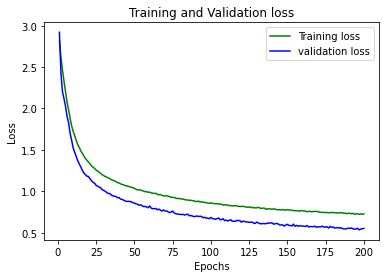

In [190]:
#Let's plot the graphs of training and validation losses vs the number of epochs for this model.
loss_train = model.history['loss']
loss_val = model.history['val_loss']
epochs = range(1,201)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

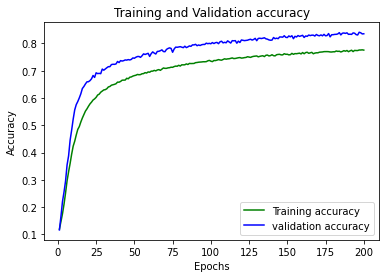

In [194]:
loss_train = model.history['accuracy']
loss_val = model.history['val_accuracy']
epochs = range(1,201)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [196]:
'''From these plots we can see that the loss for both training and validation data decreases steply at first,
   but after 15th epoch, the loss decrement tapers down and it starts decreasing slowly. This elbow point can
   be easily seen in the plot. The elbow point is higher for training loss than validation loss.
   For accuracy, similarly an elbow point is seen at around 25th epoch. After this point, the accuracy increment
   is very slow. Again, here the training accuracy has the elbow point lower than that of validation accuracy.'''

'From these plots we can see that the loss for both training and validation data decreases steply at first,\n   but after 15th epoch, the loss decrement tapers down and it starts decreasing slowly. This elbow point can\n   be easily seen in the plot. The elbow point is higher for training loss than validation loss.\n   For accuracy, similarly an elbow point is seen at around 25th epoch. After this point, the accuracy increment\n   is very slow. Again, here the training accuracy has the elbow point lower than that of validation accuracy.'